In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
df = pd.read_csv(r"C:\Users\nico_\Desktop\fichiers_csv\usedcars.csv")

In [173]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Simple linear regression 

In [174]:
from sklearn.linear_model import LinearRegression

In [175]:
lm = LinearRegression()
lm

LinearRegression()

 Comment la variable "highway-mpg" (consommation en miles/gallon sur autoroute) peut il nous aider à prédire le prix des voitures:

In [176]:
X = df[["highway-mpg"]]
y = df['price']

In [177]:
lm.fit(X,y)

LinearRegression()

In [178]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [179]:
lm.intercept_

38423.305858157386

In [180]:
lm.coef_

array([-821.73337832])

Variable engine-size/price

In [181]:
lm1 = LinearRegression()

In [182]:
X = df[["engine-size"]]
y = df['price']

In [183]:
lm1.fit(X,y)

LinearRegression()

In [184]:
lm1.intercept_

-7963.338906281049

In [185]:
lm1.coef_

array([166.86001569])

In [186]:
Yhat = -7963.34 + 166.86 * df['engine-size']
Yhat

0      13728.46
1      13728.46
2      17399.38
3      10224.40
4      14729.62
         ...   
196    15563.92
197    15563.92
198    20903.44
199    16231.36
200    15563.92
Name: engine-size, Length: 201, dtype: float64

# Multiple linear regression

horsepower, curb-weight, engine-size, highway-mpg / price

In [187]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df["price"]

In [188]:
lm.fit(X,y)

LinearRegression()

In [189]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [190]:
lm.intercept_

-15806.624626329198

normalized-losses and highway-mpg

In [191]:
X = df[["normalized-losses", "highway-mpg"]]
y = df["price"]

In [192]:
lm2 = LinearRegression()
lm2.fit(X,y)

LinearRegression()

In [193]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [194]:
lm2.intercept_

38201.313272457264

# Model Evaluation

Regression plot

highway-mpg / price

(0.0, 48157.835889847855)

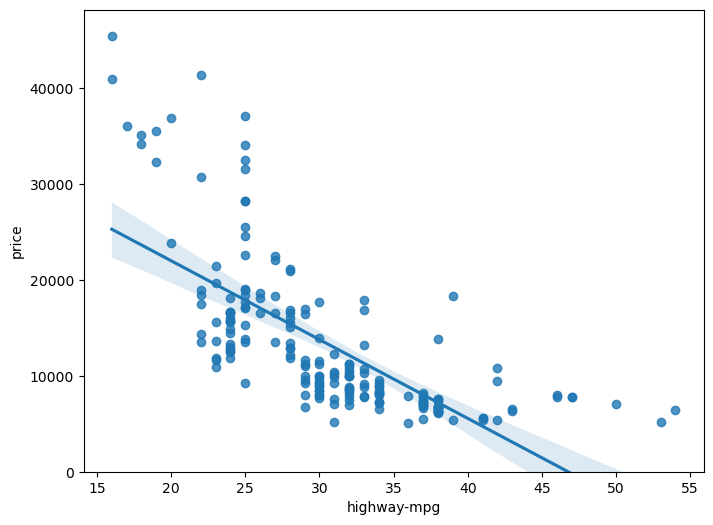

In [195]:
plt.figure(figsize=(8,6))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

peak-rpm / price

(0.0, 47414.1)

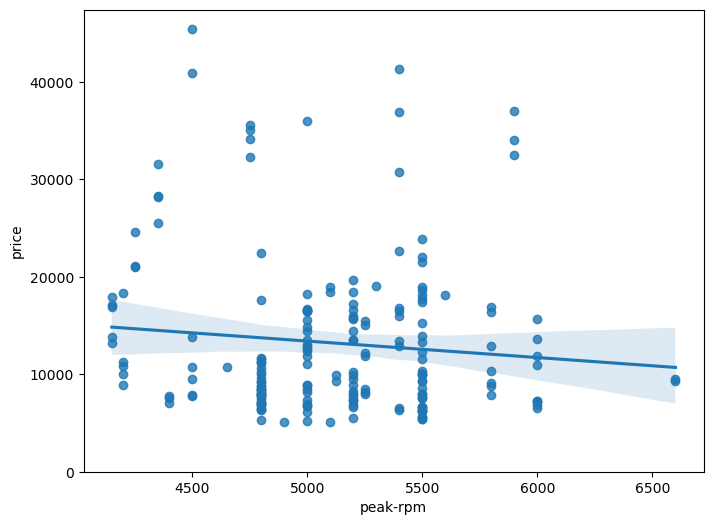

In [196]:
plt.figure(figsize=(8,6))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

Corrélation entre "peak-rpm","highway-mpg" et "price"

In [197]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


# Residual plot

highway-mpg / price

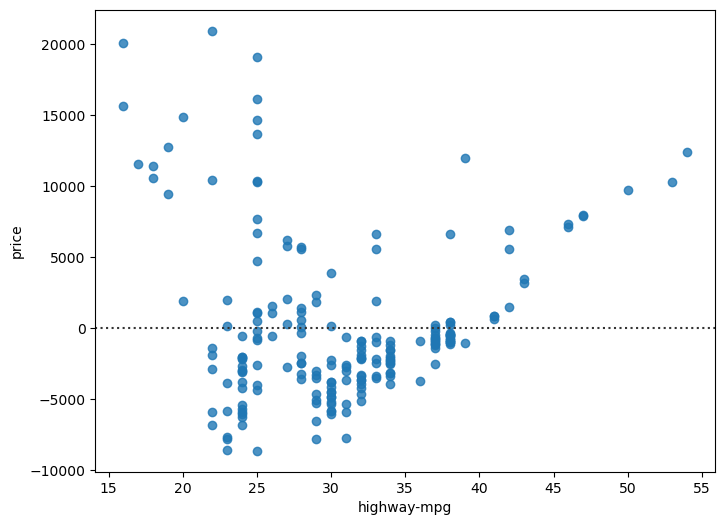

In [198]:
plt.figure(figsize=(8, 6))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

Les résidus ne sont pas répartis de manière aléatoire autour de l'axe des x, ce qui nous amène à croire qu'un modèle non linéaire est peut-être plus approprié pour ces données.

# Plot pour multiple linear regression

Impossibilité de visualiser le plot de régression et de résiduel

In [199]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df["price"]
lm.fit(X,y)
Y_hat = lm.predict(X)

C:\Users\nico_\AppData\Local\Temp\ipykernel_4252\1751045099.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\nico_\AppData\Local\Temp\ipykernel_4252\1751045099.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

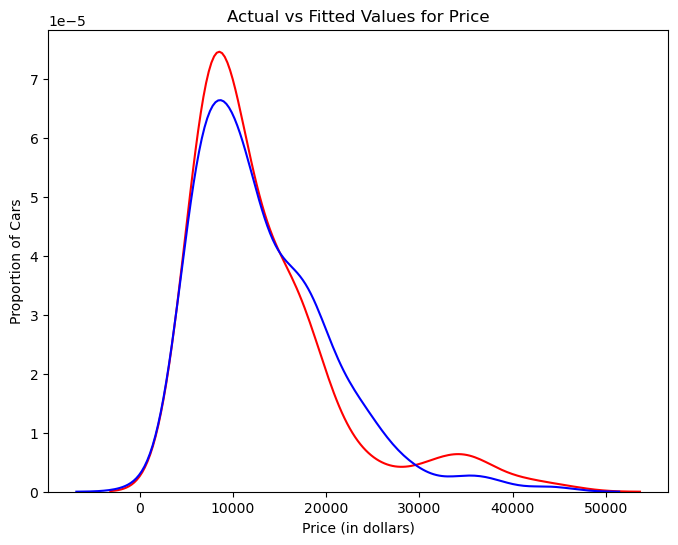

In [200]:
plt.figure(figsize=(8, 6))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.show()

Les valeurs ajustées sont raisonnablement proches des valeurs réelles puisque les deux distributions se chevauchent un peu. 

# Polynomial Regression and Pipelines

In [201]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [202]:
x = df['highway-mpg']
y = df['price']

In [203]:
# polynomial of the 3rd order 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


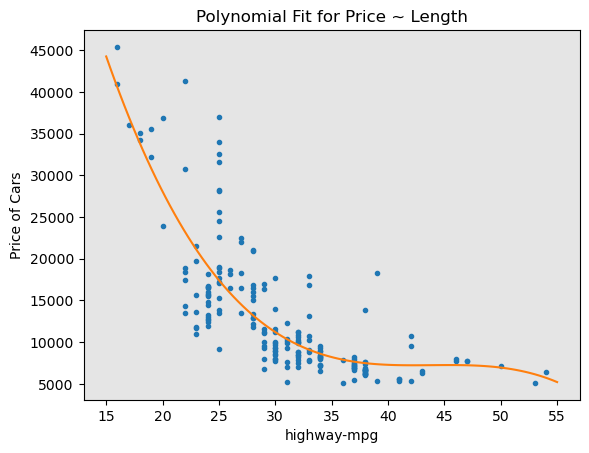

In [204]:
PlotPolly(p, x, y, 'highway-mpg')

Ce modèle polynomial est plus performant que le modèle linéaire. En effet, la fonction polynomiale générée « atteint » davantage de points de données.

Polynome d'ordre 11

In [205]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


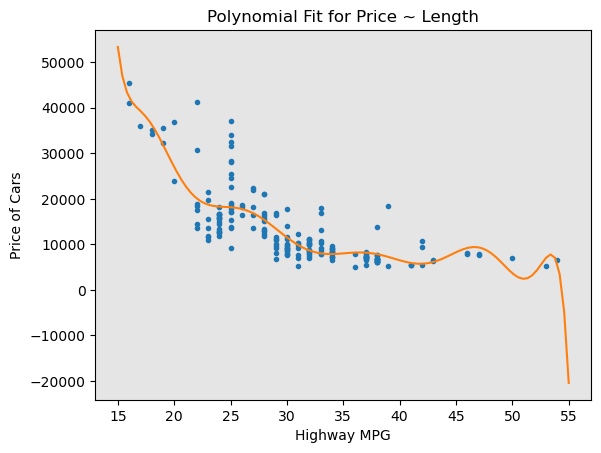

In [206]:
PlotPolly(p1,x,y, 'Highway MPG')

In [207]:
from sklearn.preprocessing import PolynomialFeatures

PolynomialFeatures de degré 2

In [208]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [209]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [210]:
X_pr=pr.fit_transform(X)

In [211]:
X.shape

(201, 4)

In [212]:
X_pr.shape

(201, 15)

Pipeline

In [213]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [214]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [215]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [216]:
X = X.astype(float)
pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [217]:
ypipe = pipe.predict(X)
ypipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

In [218]:
Input = [("scale",StandardScaler()),('model',LinearRegression())]

In [219]:
pipe = Pipeline(Input)

In [220]:
pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [221]:
ypipe = pipe.predict(X)
ypipe[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

# Evaluation

In [222]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

Simple regression

R-square

In [223]:
X = df[["highway-mpg"]]
y = df["price"]
lm.fit(X, y)

print('R-square: ', lm.score(X, y))

R-square:  0.4965911884339175


49,659% de la variation du prix s'explique par ce modèle linéaire simple 

MSE

In [224]:
from sklearn.metrics import mean_squared_error

In [225]:
Yhat=lm.predict(X)

In [226]:
mse = mean_squared_error(df['price'], Yhat)
print("mse:", mse)

mse: 31635042.944639895


Multiple regression

In [227]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

lm.fit(X, df['price'])

print('R-square: ', lm.score(X, df['price']))

R-square:  0.8093562806577457


80,896 % de la variation du prix s'explique par cette régression linéaire multiple

In [228]:
yhat = lm.predict(X)

In [229]:
print('mse:', mean_squared_error(df['price'], yhat))

mse: 11980366.87072649


Polynomial Fit

In [230]:
from sklearn.metrics import r2_score

x = df['highway-mpg']
r_squared = r2_score(y, p(x))
print('R-square: ', r_squared)

R-square:  0.6741946663906513


67,419 % de la variation du prix s'explique par cette régression polynomiale

In [231]:
mean_squared_error(df['price'], p(x))

20474146.42636125

In [232]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [243]:
X = df[['highway-mpg']]
y = df['price']

In [245]:
lm = LinearRegression()
lm

LinearRegression()

In [246]:
lm.fit(X,y)

LinearRegression()

In [247]:
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\nico_\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

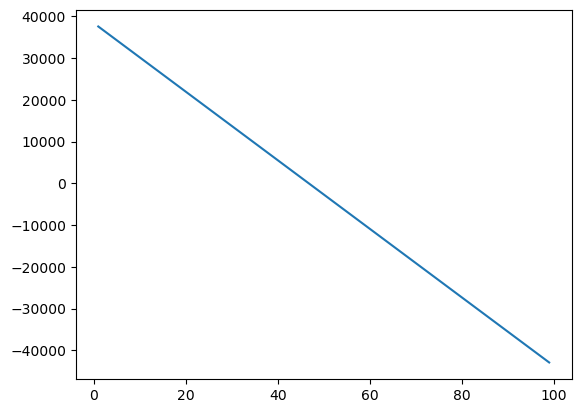

In [248]:
plt.plot(new_input, yhat)
plt.show()